# Brecha Salarial de Género en Argentina
Este proyecto fue realizado por el grupo 15 constituido por Daniela Ferraro y Jorgelina Sigal. Se utilizó un conjunto de datos provenientes del Ministerio de Trabajo, Empleo y Seguridad Social que contiene información sobre las remuneraciones en Argentina, desagregadas por género, tipo de industria y fecha. El objetivo es analizar las brechas salariales de género y su evolución. 

### Dataset
https://www.trabajo.gob.ar/estadisticas/oede/empleoyremuneracion.asp

### Contenido del dataset
#### Periodo: 
Indica año y mes al que corresponde la remuneración.
#### Industria: 
Nombre del sector o rama de actividad económica.
#### Género: 
Género del grupo de trabajadores al que pertenece la remuneración.
#### Mujer: 
Variable binaria (1 o 0) toma el valor 1 si es mujer, 0 si no. Útil para análisis estadístico, modelos y gráficos.
#### Varon: 
Variable binaria (1 o 0) toma el valor 1 si es varón, 0 si no. Útil para análisis estadístico, modelos y gráficos.
#### Remuneración: 
Remuneración promedio mensual para ese sector, género y período (en pesos argentinos).
#### Año:
Extracción del año de la columna período.

### Objetivo general
Analizar la evolución de la remuneración media del empleo registrado en el sector privado en Argentina, según rama de actividad y género, en el período comprendido entre enero de 1996 y octubre de 2022, utilizando herramientas de data science, con el fin de identificar patrones, desigualdades y tendencias vinculadas a la brecha salarial de género en el mundo laboral.

### Objetivos específicos
- Procesar y limpiar el conjunto de datos proporcionado mediante herramientas de data science, utilizando bibliotecas como pandas para su análisis exploratorio.

- Describir la evolución temporal de la remuneración media del empleo registrado en el sector privado, diferenciando por género y rama de actividad (según el CIIU rev. 3 a dos dígitos).

- Comparar las trayectorias salariales entre varones y mujeres en los distintos sectores de actividad, identificando las ramas con mayores y menores brechas de género.

- Visualizar los resultados mediante gráficos que faciliten la comprensión de las desigualdades salariales en el período analizado.

- Aplicar un modelo de aprendizaje supervisado de regresión para predecir la remuneración media en función del género, la rama de actividad y el período, evaluando su desempeño y analizando la importancia relativa de cada variable.

- Reflexionar sobre las implicancias sociales y económicas de las desigualdades de género en el mundo laboral formal, a partir de los hallazgos del análisis de datos.

### Tecnologías
- Python 3
- Pandas
- Jupyter Notebook
- Visual Studio Code
- Matplotlib 
- Seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

## Análisis y exploración de datos

En esta etapa se realiza el análisis y exploración de datos necesario para tener conocimiento del tipo de datos con los que se trabaja, y cuáles son necesarios transformar más adelante.
Se incluye:
- Denominación de columnas.
- Verificación de valores nulos.
- Verificación de valores únicos.

In [2]:
remuneraciones = pd.read_csv('Remuneraciones.csv', header=0, skiprows=[1])

In [3]:
# Vista general del dataset
print(remuneraciones.head())

  Periodo                Industria   Genero  Valor
0  feb-96  agricultura y ganaderia  Mujeres  406.8
1  mar-96  agricultura y ganaderia  Mujeres  399.7
2  abr-96  agricultura y ganaderia  Mujeres  375.9
3  may-96  agricultura y ganaderia  Mujeres  395.6
4  jun-96  agricultura y ganaderia  Mujeres  554.0


In [4]:
# Asignación de nombres a las columnas
remuneraciones.columns = ['Periodo', 'Industria', 'Genero', 'Valor']
# Comprobación de existencia de nombres
print(remuneraciones.columns)

Index(['Periodo', 'Industria', 'Genero', 'Valor'], dtype='object')


In [5]:
# Verificación de valores nulos
remuneraciones.isnull().sum()

Periodo      0
Industria    0
Genero       0
Valor        0
dtype: int64

In [6]:
# Verificación de valores únicos en la columna
print(remuneraciones['Genero'].unique())

['Mujeres' 'Varones']


## Procesamiento y transformación de datos

En esta sección se lleva a cabo el procesamiento y la transformación de las variables relevantes para asegurar la calidad, consistencia y utilidad de los datos.
Las tareas incluyen:
- Conversión de tipos de datos.
- Codificación de variables categóricas.
- Escalado de características numéricas.
- Creación de nuevas variables que permitan enriquecer el análisis posterior.

Este paso es clave para garantizar que los algoritmos de machine learning puedan operar de manera efectiva y producir resultados confiables y representativos.

1. Primero se convirtió la variable Periodo a formato numérico para que los modelos pudieran trabajar con esa información temporal.

In [7]:
# Reemplazo de abreviaturas en español por números
meses = {
    'ene': '01', 'feb': '02', 'mar': '03', 'abr': '04',
    'may': '05', 'jun': '06', 'jul': '07', 'ago': '08',
    'sep': '09', 'oct': '10', 'nov': '11', 'dic': '12'
}

# Aplicación del reemplazo
remuneraciones['Periodo'] = remuneraciones['Periodo'].str.lower().replace(meses, regex=True)

# Conversión a datetime
remuneraciones['Periodo'] = pd.to_datetime('01-' + remuneraciones['Periodo'], format='%d-%m-%y')

In [8]:
# Extracción del año como número
remuneraciones['Año'] = remuneraciones['Periodo'].dt.year

In [9]:
# Muestra del resultado de la conversión
print(remuneraciones['Periodo'])

0       1996-02-01
1       1996-03-01
2       1996-04-01
3       1996-05-01
4       1996-06-01
           ...    
36702   2022-06-01
36703   2022-07-01
36704   2022-08-01
36705   2022-09-01
36706   2022-10-01
Name: Periodo, Length: 36707, dtype: datetime64[ns]


In [10]:
# Muestra del tipo de datos generado
print(remuneraciones.dtypes)

Periodo      datetime64[ns]
Industria            object
Genero               object
Valor               float64
Año                   int32
dtype: object


2. Se codificó la variable Género, ya que los algoritmos de machine learning no pueden trabajar con texto.

In [11]:
# Conversión de texto a número
remuneraciones['Genero'] = remuneraciones['Genero'].map({'Varones': 0, 'Mujeres': 1})

3. Se codificó la variable Industria, evaluando distintos métodos para evitar alta dimensionalidad.

En primera instancia, se aplicó One-Hot Encoding para codificar la variable Industria obteniendo resultados desfavorables con respecto al aumento de la dimensión del dataset. Además, la combinación del modelo Random Forest Regressor no resulta bien con relaciones lineales entre valores codificados. Por eso, se eligió Label Encoder en combinación con Random Forest Regressor, ya que tolera muy bien variables categóricas codificadas como enteros.


In [12]:
# Codificación de la variable industria
le = LabelEncoder()
remuneraciones['Industria'] = le.fit_transform(remuneraciones['Industria'])

4. Se realizó el escalado de variables numéricas y selección de features para alimentar el modelo.

In [13]:
# Separación de X e y
X = remuneraciones[['Genero', 'Industria', 'Año']]
y = remuneraciones['Valor']

In [14]:
# División del modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Definición la grilla de hiperparámetros
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

### Modelo de regresión con Random Forest Regressor

5. Se eligió un modelo de regresión con Random Forest Regressor, por su capacidad para capturar relaciones no lineales y su robustez frente a variables categóricas ya codificadas.

En primera instancia se evaluó un enfoque invertido al de la decisión final, siendo: ¿Es posible predecir el género de una persona a partir de su remuneración? Donde era necesario plantear un modelo de clasificación.

#### Modelos de clasificación evaluados 
- Regresión logística
- Random forest
- Árbol de decisión

Los resultados arrojaron:
- Bajo desempeño en todos los modelos (precisión menor a %51).
- Métricas como accuracy, precision, recall y f1-score revelaron que los modelos no lograban predecir correctamente el género en base a la remuneración y la industria.
- Esto reveló que la remuneración media por si sola no es un predictor fiable del género.

Esto presentaba un gran conflicto ético además de los resultados desfavorables, ya que el planteo de la prediccién del género a partir de la remuneración es controversial y puede generar estigmas sociales y malinterpretaciones.

Luego, se invirtió el enfoque para estudiar: ¿Es posible predecir la remuneración de una persona a partir del género, industria y período? Siendo necesario el planteo de un modelo de regresion.

#### Modelos de regresión evaluados
- Regresión lineal
- Árbol de decisión
- Random forest

Los resultados arrojaron: 
- El modelo de regresión lineal tuvo muy bajo R² (~0.04), indicando que no capturaba bien la variabilidad.
- El árbol de decisión mejoró levemente los resultados.
- Random forest ofreció el mejor desempeño, con un R² cercano a 0.93 y bajo error cuadrático medio (MSE), indicando un excelente ajuste al modelo.

In [16]:
# Creación del modelo base
rf = RandomForestRegressor(random_state=42)

In [17]:
# Configuración de GridSearchCV
grid_search = GridSearchCV(estimator=rf,param_grid=param_grid,cv=3,scoring='r2',n_jobs=-1)

In [26]:
# Obtener el mejor modelo entrenado
best_model = grid_search.best_estimator_

# Predicciones
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Evaluación en train
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Evaluación en test
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Imprimir resultados
print('Train - MSE:', mse_train)
print('Train - R² :', r2_train)
print('Test  - MSE:', mse_test)
print('Test  - R² :', r2_test)

Train - MSE: 125369660.35884486
Train - R² : 0.9481851040750942
Test  - MSE: 186112907.4982259
Test  - R² : 0.9274721762258531


Esto significa que el modelo explica el 94.8% de la varianza en los datos de entrenamiento y el 92.7% en los datos de test. La diferencia de 2% es pequeña, indicando muy buena generalización.

No se presenta **overfitting**, ya que:
- El desempeño en los datos de prueba es muy similar al del entrenamiento.
- El modelo generaliza bien, es decir, aprendió los patrones reales y no simplemente los datos exactos de entrenamiento.
- La diferencia entre R² train y test es pequeña y aceptable.

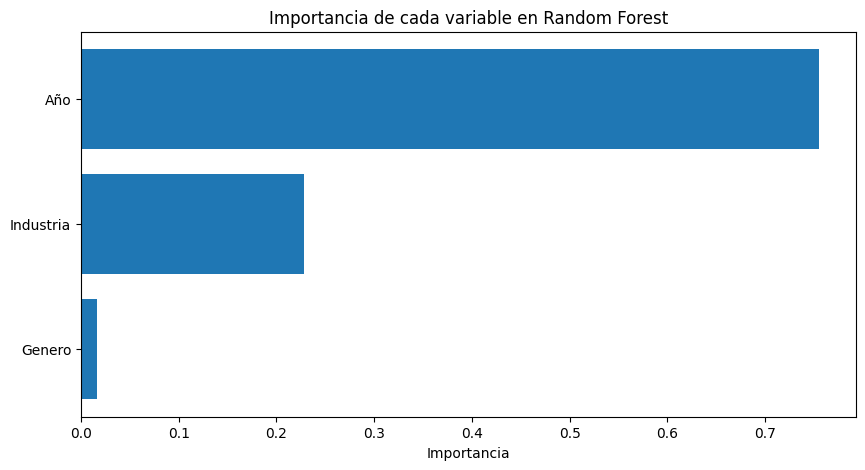

In [27]:
# Gráfico donde se mide la importancia de las variables en juego
feature_importances = best_model.feature_importances_
features = X.columns
plt.figure(figsize=(10,5))
plt.barh(features, feature_importances)
plt.xlabel('Importancia')
plt.title('Importancia de cada variable en Random Forest')
plt.show()

*El gráfico muestra la importancia relativa que cada variable tuvo en la predicción de la remuneración según el modelo Random Forest Regressor. Las importancias se calculan en base a cuánto cada variable contribuye a reducir la impureza en los nodos del bosque de árboles de decisión.*
- Año es la variable con mayor importancia (≈ 0.75): esto indica que la evolución temporal es el principal factor asociado a los cambios en la remuneración.
- Industria tiene una importancia intermedia (≈ 0.23): sugiere que el sector económico también influye, aunque en menor medida.
- Género muestra una importancia muy baja (≈ 0.02): esto implica que, según el modelo, el género tiene una influencia menor al momento de predecir el salario comparado con las otras variables.

Se concluyó que:

- Año concentra cambios macroeconómicos (inflación, convenios colectivos, políticas públicas, etc.) que afectan de forma estructural los sueldos.

- Industria influye porque hay sectores con remuneraciones históricamente más altas (por ejemplo, minería o finanzas) que otros (como educación o servicios sociales).

- Género, si bien tiene un impacto reconocido en estudios sociales y económicos, puede haber quedado subestimado por
    - La codificación binaria.
    - El hecho de que otras variables capturen más variabilidad (multicolinealidad).
    - La estructura del modelo, que no detecta bien diferencias sutiles o sistémicas en igualdad de condiciones.
 
El modelo Random Forest Regressor logró un buen rendimiento predictivo, con un R² de 0.94 en entrenamiento y 0.93 en test, lo que demuestra ausencia de overfitting y una buena capacidad de generalización. 

El análisis de la importancia de variables mostró que el año es el factor más relevante en la predicción de la remuneración, seguido por la industria. En cambio, la variable género tuvo una importancia significativamente menor.

Esto no significa necesariamente que no exista brecha salarial por género, sino que dentro del modelo actual, y dado el conjunto de variables utilizadas, el género no tuvo un peso fuerte en la predicción directa del salario. 

Estos resultados resaltan la necesidad de un análisis más detallado sobre cómo interactúan las variables y cómo podrían incorporarse nuevas variables o enfoques (como análisis por subgrupos o modelos explicativos) para estudiar la desigualdad salarial por género.